In [221]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlp
from scipy import stats
from matplotlib import cm
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [222]:
df=pd.read_csv(r"C:\Users\indum\Downloads\NFLX.csv")

In [223]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [224]:
df.shape

(1009, 7)

In [225]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [226]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1004    False
1005    False
1006    False
1007    False
1008    False
Length: 1009, dtype: bool

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [228]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [229]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [230]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [231]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [232]:
df.nunique()

Date         1009
Open          976
High          983
Low           989
Close         988
Adj Close     988
Volume       1005
dtype: int64

In [233]:
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1004,False,False,False,False,False,False,False
1005,False,False,False,False,False,False,False
1006,False,False,False,False,False,False,False
1007,False,False,False,False,False,False,False


In [234]:
df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [235]:
df.value_counts()

Date        Open        High        Low         Close       Adj Close   Volume  
2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995  11896100    1
2020-10-14  562.609985  572.489990  541.000000  541.450012  541.450012  9499000     1
2020-09-25  474.390015  484.869995  468.029999  482.880005  482.880005  3769400     1
2020-09-28  489.109985  492.000000  477.880005  490.649994  490.649994  4773500     1
2020-09-29  489.500000  496.290009  486.529999  493.480011  493.480011  3541500     1
                                                                                   ..
2019-06-14  341.630005  343.399994  336.160004  339.730011  339.730011  5019000     1
2019-06-17  342.690002  351.769989  342.059998  350.619995  350.619995  5358200     1
2019-06-18  355.570007  361.500000  353.750000  357.119995  357.119995  5428500     1
2019-06-19  361.720001  364.739990  356.119995  363.519989  363.519989  5667200     1
2022-02-04  407.309998  412.769989  396.640015  410.170013 

In [236]:
df['Low'].unique()

array([250.029999, 245.      , 264.329987, 250.      , 236.110001,
       249.      , 254.699997, 260.329987, 267.630005, 275.690002,
       276.609985, 280.01001 , 274.450012, 277.809998, 287.01001 ,
       290.589996, 290.779999, 283.829987, 283.230011, 297.600006,
       316.5     , 314.549988, 314.130005, 320.230011, 318.600006,
       313.279999, 317.700012, 318.140015, 318.369995, 307.339996,
       312.799988, 314.51001 , 305.660004, 300.359985, 302.      ,
       297.      , 281.609985, 275.899994, 275.049988, 278.01001 ,
       271.220001, 289.109985, 285.649994, 289.119995, 291.690002,
       301.820007, 306.75    , 308.230011, 304.      , 323.769989,
       331.100006, 326.769989, 326.      , 317.079987, 302.309998,
       292.619995, 305.579987, 306.5     , 310.119995, 306.690002,
       310.399994, 305.730011, 307.670013, 319.339996, 323.049988,
       327.51001 , 327.339996, 324.869995, 327.040009, 322.429993,
       325.140015, 323.170013, 322.799988, 325.450012, 331.149

In [237]:
df['High'].unique()

array([267.899994, 266.700012, 272.450012, 267.619995, 255.800003,
       259.149994, 261.410004, 269.880005, 280.5     , 281.959991,
       285.809998, 286.640015, 284.5     , 286.      , 295.649994,
       297.359985, 295.75    , 295.25    , 301.179993, 316.910004,
       325.790009, 323.73999 , 322.920013, 331.440002, 333.980011,
       325.839996, 323.880005, 323.399994, 324.109985, 317.      ,
       319.5     , 319.399994, 314.119995, 309.369995, 321.029999,
       322.899994, 298.799988, 295.350006, 292.869995, 291.25    ,
       290.309998, 299.160004, 298.850006, 299.549988, 298.950012,
       311.640015, 311.130005, 317.48999 , 316.100006, 338.619995,
       338.820007, 335.309998, 336.51001 , 331.220001, 320.25    ,
       309.980011, 316.630005, 317.450012, 317.880005, 313.480011,
       317.100006, 312.589996, 320.980011, 329.019989, 327.350006,
       331.950012, 332.059998, 331.26001 , 330.5     , 326.940002,
       329.720001, 330.450012, 326.420013, 331.880005, 336.630

ValueError: num must be 1 <= num <= 4, not 5

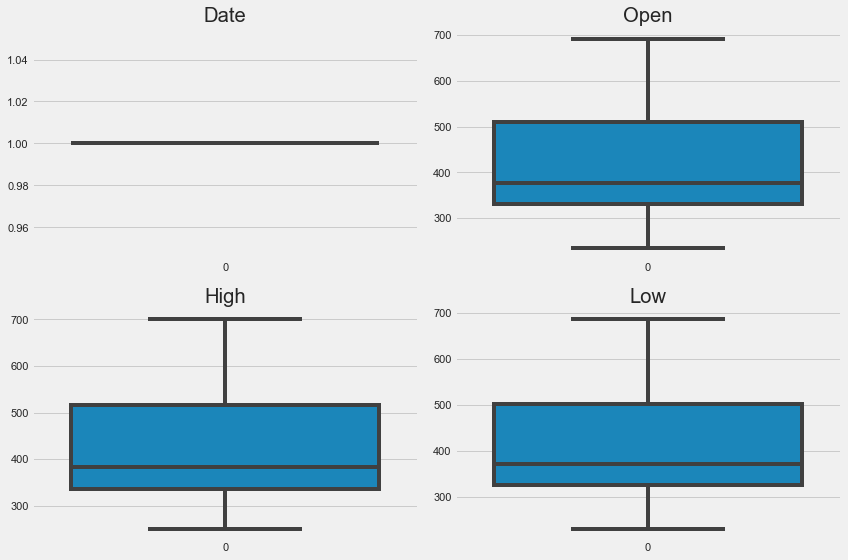

In [242]:
# Exclude non-numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Create boxplots for each numeric column to visualize outliers
mlp.figure(figsize=(12, 8))
for col in numeric_cols:
    mlp.subplot(2, 2, numeric_cols.get_loc(col) + 1)  # Adjust subplot position
    sb.boxplot(data=df[col])
    mlp.title(col)
    mlp.tight_layout()

mlp.show()

In [239]:
# Make Frequency Map According to the Data frame Values 
frequency_map = df['Date'].value_counts().to_dict()
df['Date'] = df['Date'].map(frequency_map)

<AxesSubplot:>

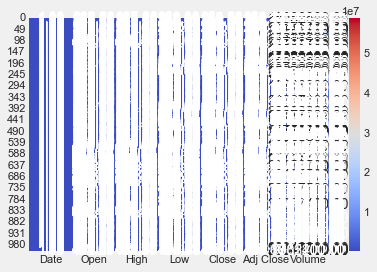

In [160]:
sb.heatmap(df, annot=True, cmap='coolwarm', fmt=".2f")

<AxesSubplot:>

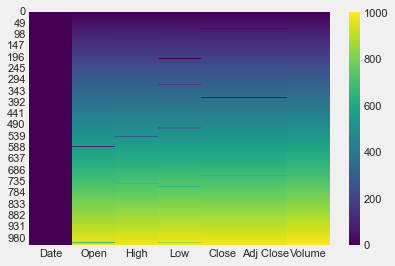

In [161]:
#Make heat map to See Relation of Stock Prices
sb.heatmap(df.apply(lambda x: pd.factorize(x)[0]), cmap='viridis', annot=False)

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>],
       [<AxesSubplot:title={'center':'Volume'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

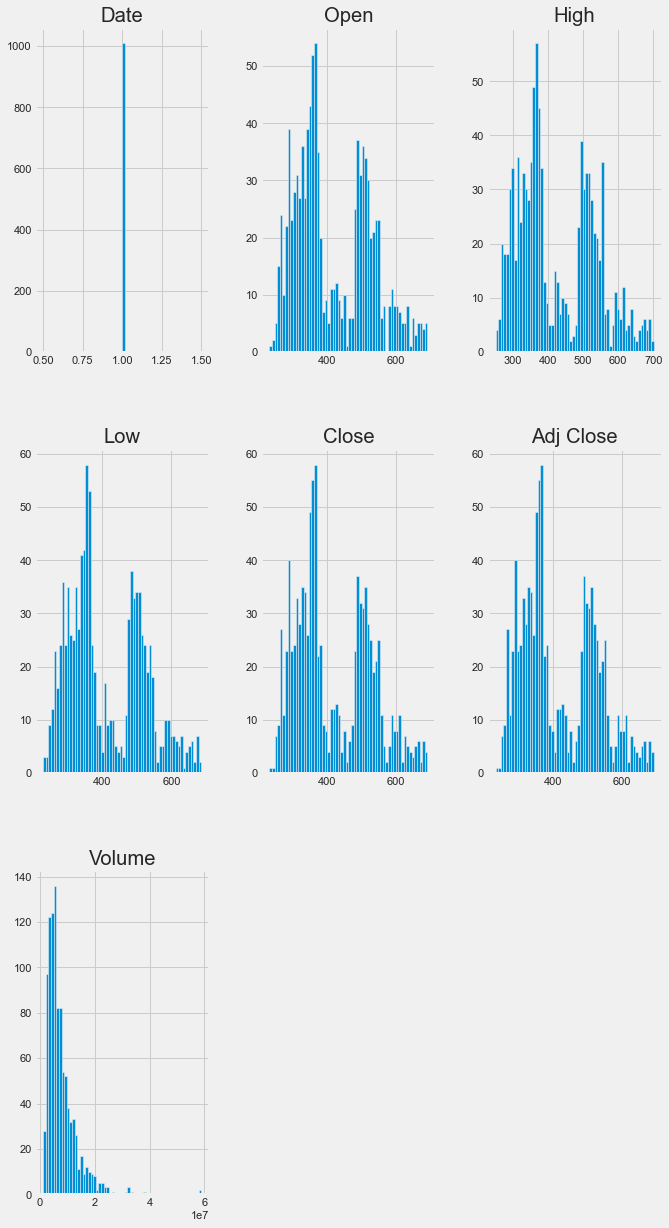

In [162]:
#Make Histogram of All Data set
df.hist(bins=60,figsize=(10,20))

In [163]:
coe=df.corr()

<AxesSubplot:>

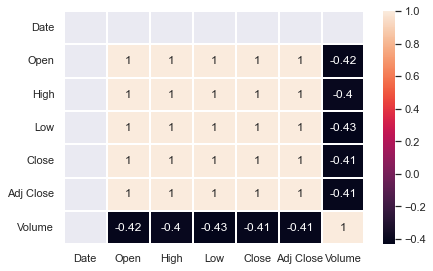

In [164]:
#Their are all Uinque Values 1,1 and some other Differencies
sb.set_theme()
sb.heatmap(coe,xticklabels=coe.columns,yticklabels=coe.columns,annot=True,linewidth=.13)

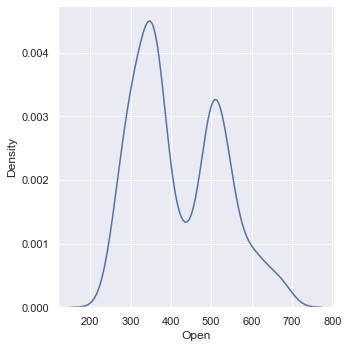

In [165]:
#Open Stock Price According to their density
sb.displot(df["Open"], kind="kde")

<AxesSubplot:xlabel='Adj Close', ylabel='High'>

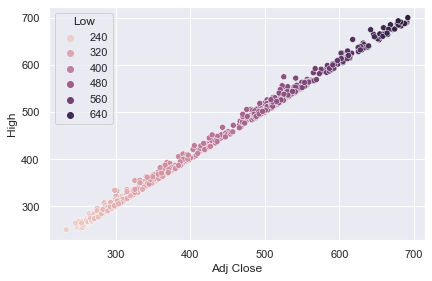

In [166]:
# About The Adj Close , High and low Stock prices 
sb.scatterplot(x="Adj Close",y="High",hue="Low",data=df)

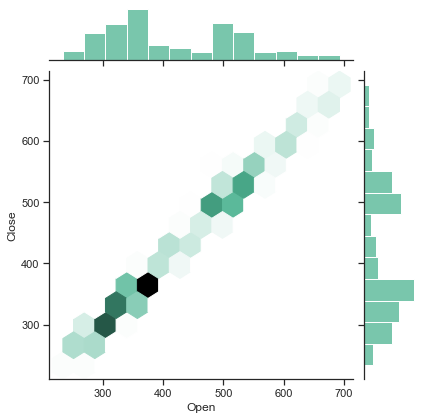

In [167]:
# Prediction Dots When Dots Darker Shows Stocks Close and Open on Same Time 

x = df['Open']
y = df['Close']

sb.set_theme(style="ticks")

sb.jointplot(x=x, y=y, kind="hex", color="#4CB391")

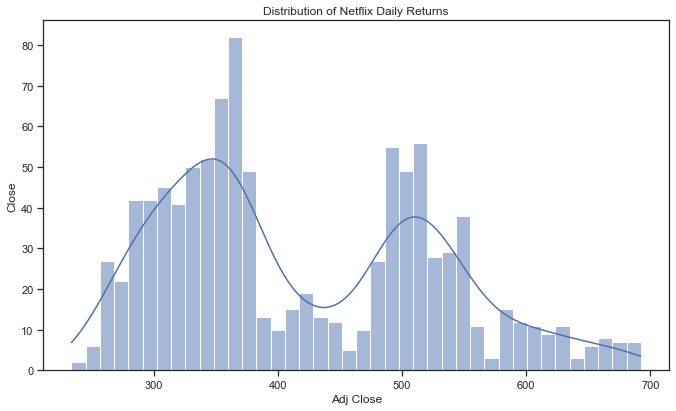

In [168]:
# This Plotation on Stock prices When on Close , Adjacent Close and on Open Stages .

mlp.figure(figsize=(10, 6))
sb.histplot(df['Open'].dropna(), bins=40, kde=True)
mlp.title('Distribution of Netflix Daily Returns')
mlp.xlabel('Adj Close')
mlp.ylabel('Close')
mlp.show()

In [169]:
# Plot Netflix High Stock Prices 
def volume_analysis(df,cmp_name):
    df['High'].plot(figsize=(10,7),title='Netflix '+cmp_name+' Stock Prices',c='orange')
    mlp.ylabel('Volume')
    mlp.show()

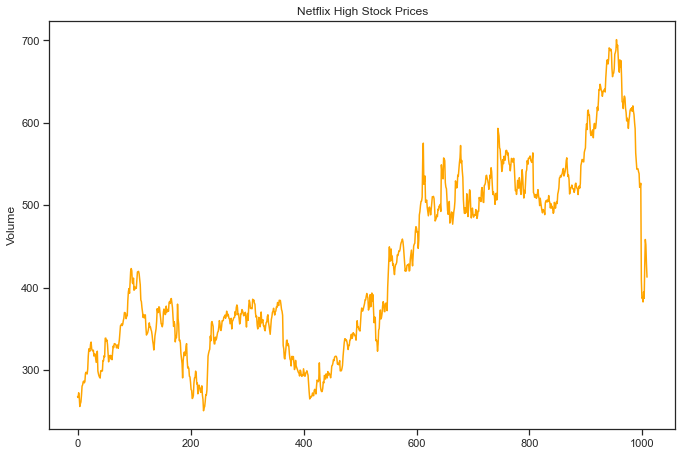

In [170]:
volume_analysis(df,'High')

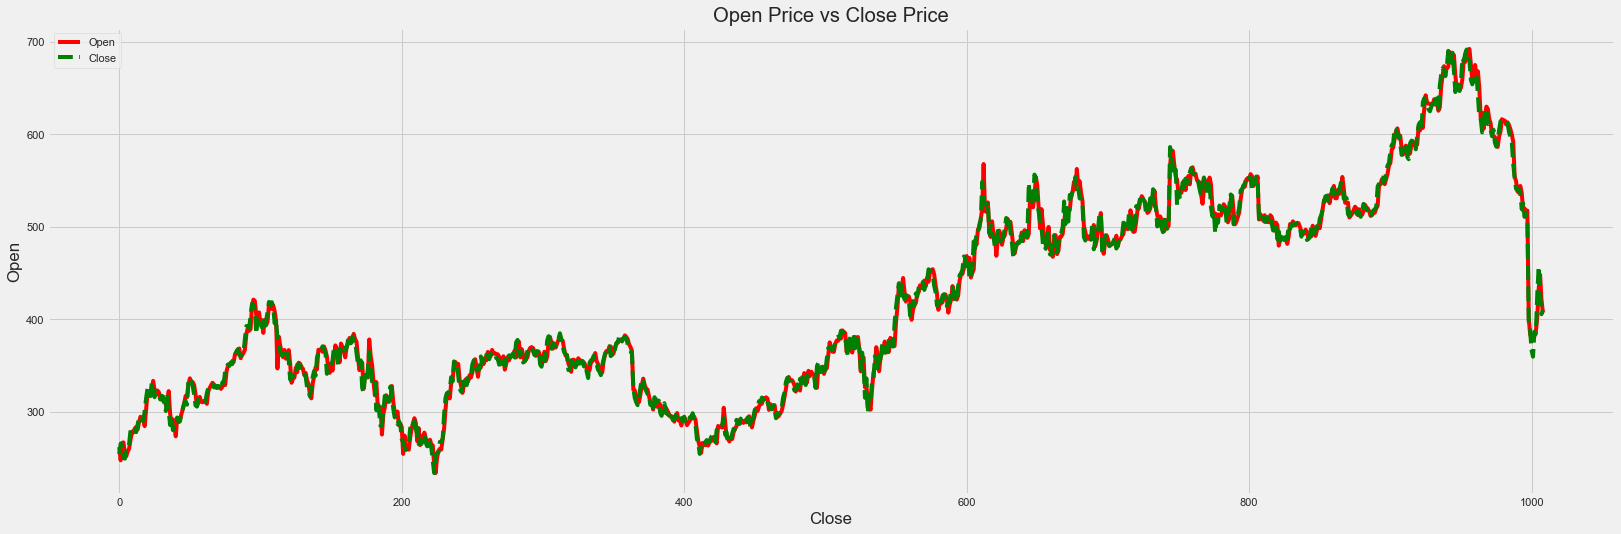

In [171]:
# Comparison on Stock Prices When Open and Close 


mlp.style.use('fivethirtyeight')


mlp.subplots(figsize=(25, 8))
mlp.title("Open Price vs Close Price")
mlp.plot(df['Open'], color='red', linestyle='solid',  label = 'Open')
mlp.plot(df['Close'], color='green', linestyle='dashed',  label = 'Close')
mlp.xlabel("Close")
mlp.ylabel("Open")
mlp.legend(loc="upper left")
mlp.show()

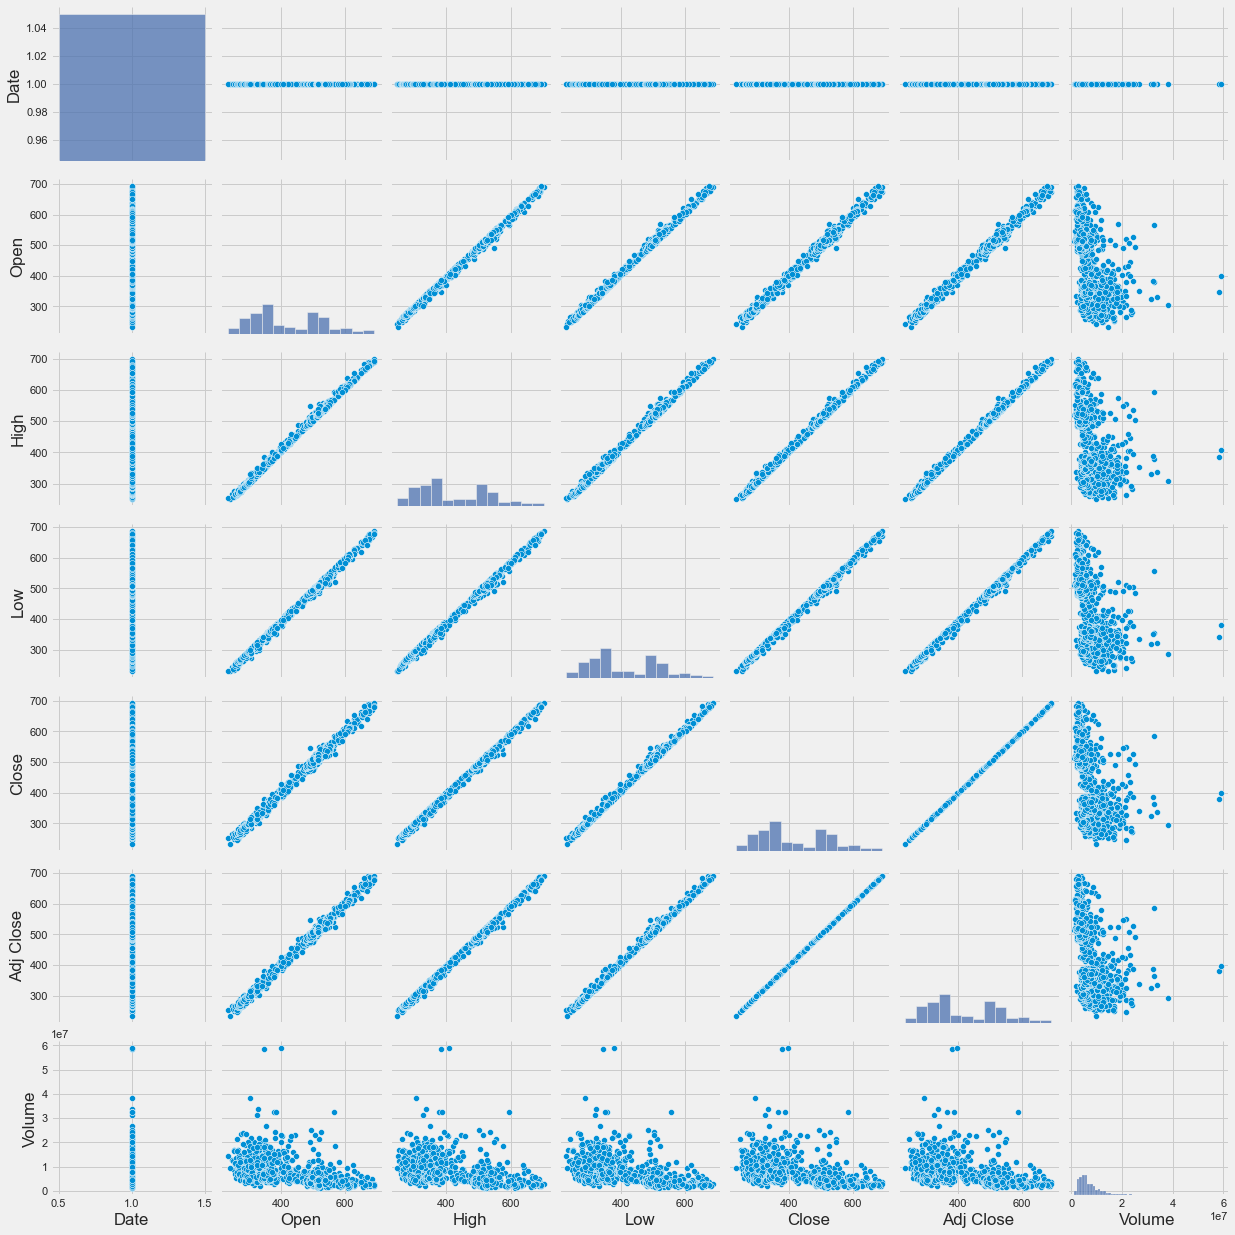

In [172]:
sb.pairplot(df)

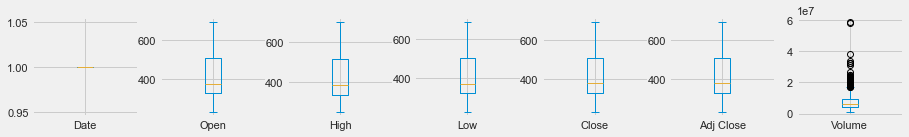

In [173]:
df.plot(kind='box',subplots=True,layout=(10,10),figsize=(20,20))
mlp.show()

In [174]:
df_cor=df.corr()
df_cor

,Date,Open,High,Low,Close,Adj Close,Volume
Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,NaN,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,NaN,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,NaN,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,NaN,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,NaN,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,NaN,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


In [175]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [176]:
train_data.shape, test_data.shape

((807, 7), (202, 7))

In [177]:
scaler = MinMaxScaler()

In [178]:
scalerr = MinMaxScaler()

In [179]:
train_data_scaled = scaler.fit_transform(train_data)
train_data_scaled

array([[0.        , 0.17860959, 0.14960206, ..., 0.17439697, 0.17439697,
        0.14992077],
       [0.        , 0.28898633, 0.26224888, ..., 0.27364546, 0.27364546,
        0.10854764],
       [0.        , 0.30501932, 0.28738923, ..., 0.30631203, 0.30631203,
        0.06049766],
       ...,
       [0.        , 0.67691906, 0.66287127, ..., 0.66183209, 0.66183209,
        0.02491101],
       [0.        , 0.09626332, 0.07914141, ..., 0.10512013, 0.10512013,
        0.08610638],
       [0.        , 0.33054124, 0.33309287, ..., 0.35996755, 0.35996755,
        0.1189803 ]])

In [180]:
test_data_scaled = scaler.transform(test_data)
test_data_scaled

array([[0.        , 0.57747095, 0.5857591 , ..., 0.60416715, 0.60416715,
        0.07499163],
       [0.        , 0.59230423, 0.58091143, ..., 0.57150058, 0.57150058,
        0.08023833],
       [0.        , 0.5964488 , 0.59491335, ..., 0.58493084, 0.58493084,
        0.05016219],
       ...,
       [0.        , 0.11825144, 0.10166625, ..., 0.09081345, 0.09081345,
        0.19982609],
       [0.        , 0.28200602, 0.27101986, ..., 0.29827134, 0.29827134,
        0.04948878],
       [0.        , 0.2564841 , 0.23776243, ..., 0.25381769, 0.25381769,
        0.14632288]])

In [181]:
#Creating a data structure with 50 timesteps and 1 output, timestep is our memory size
#In this function we are creating our train data with 50x stock price and next one is 1 scrolled data.
#for example X_tain[0] will be our data's 0 to 49. values
#X_train[1] will be our data's 1 to 50. values
#this 50 is our memory size, it will remember this way what we had before.
X_train=[]
y_train=[]
timesteps=50
for i in range(timesteps,len(train_data_scaled)):
    X_train.append(train_data_scaled[i-timesteps:i,0])
    y_train.append(train_data_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [182]:
real_stock_price=test_data.loc[:,["Open"]].values

In [183]:
regressor=Sequential()
#Adding the first RNN Layer and some Dropout Regularisation
regressor.add(SimpleRNN(units=50,activation="tanh",return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0,2))

#Adding the second RNN Layer and some Dropout Regularisation
regressor.add(SimpleRNN(units=50,activation="tanh",return_sequences=True))
regressor.add(Dropout(0,2))
              
#Adding the third RNN Layer and some Dropout Regularisation              
regressor.add(SimpleRNN(units=50,activation="tanh",return_sequences=True))
regressor.add(Dropout(0,2))

#Adding the third RNN Layer and some Dropout Regularisation              
regressor.add(SimpleRNN(units=50,activation="tanh",return_sequences=True))
regressor.add(Dropout(0,2))

#Adding the fourth RNN Layer and some Dropout Regularisation
regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0,2))
              
#Adding the output Layer
regressor.add(Dense(units=1))

In [184]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 50, 50)            2600      
                                                                 
 dropout_5 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_6 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_7 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 50, 50)           

In [185]:
#Compling the RNN
regressor.compile(optimizer="adam",loss="mean_squared_error")

In [188]:
dataset_total=pd.concat((train_data["Open"],test_data["Open"]), axis=0)
inputs= dataset_total[len(dataset_total)-len(train_data)-timesteps:].values.reshape(-1,1)
inputs=scalerr.fit_transform(inputs)

In [189]:
#prediction
X_test=[]
for i in range(timesteps,timesteps+len(test_data_scaled)):
    X_test.append(inputs[i-timesteps:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=scalerr.inverse_transform(predicted_stock_price)

7/7 [==============================] - 2s 28ms/step


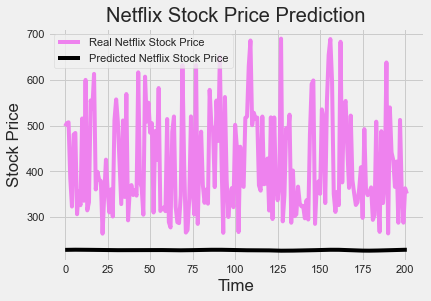

In [200]:
#visualising
mlp.plot(real_stock_price,color="violet",label="Real Netflix Stock Price")
mlp.plot(predicted_stock_price,color="black",label="Predicted Netflix Stock Price")
mlp.title("Netflix Stock Price Prediction")
mlp.xlabel("Time")
mlp.ylabel("Stock Price")
mlp.legend()
mlp.show()

In [192]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [193]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 dropout_10 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_11 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_12 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50, 50)           

In [194]:
model.compile(loss = 'mean_squared_error', optimizer = 'Adam')

In [195]:
dataset_total=pd.concat((train_data["Open"],test_data["Open"]), axis=0)
inputs= dataset_total[len(dataset_total)-len(test_data)-timesteps:].values.reshape(-1,1)
inputs=scalerr.transform(inputs)

In [196]:
X_test=[]
for i in range(timesteps,timesteps+len(test_data)):
    X_test.append(inputs[i-timesteps:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=model.predict(X_test)
predicted_stock_price=scalerr.inverse_transform(predicted_stock_price)

7/7 [==============================] - 7s 85ms/step


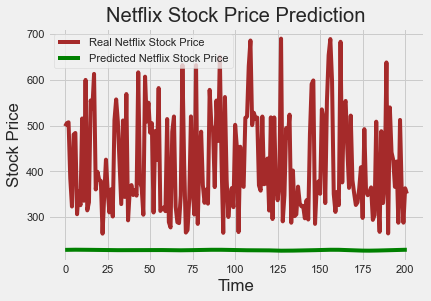

In [199]:
mlp.plot(real_stock_price,color="brown",label="Real Netflix Stock Price")
mlp.plot(predicted_stock_price,color="green",label="Predicted Netflix Stock Price")
mlp.title("Netflix Stock Price Prediction")
mlp.xlabel("Time")
mlp.ylabel("Stock Price")
mlp.legend()
mlp.show()

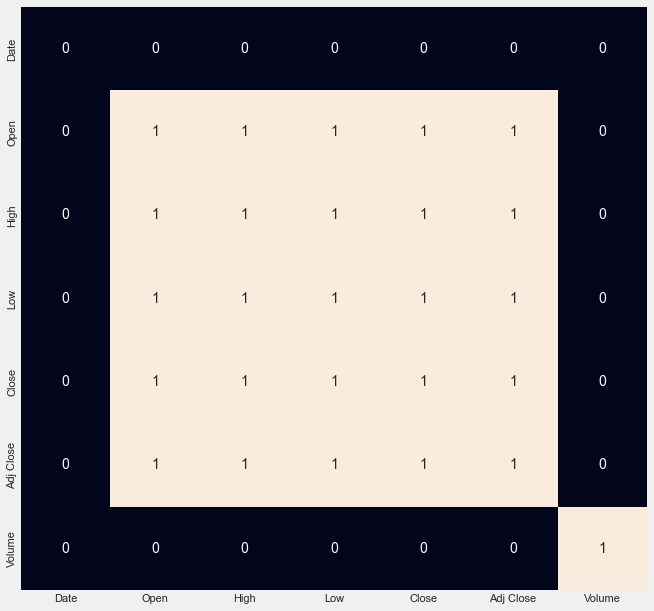

In [201]:
mlp.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
mlp.show()